In [22]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime

# from google.colab import drive
# drive.mount("/content/drive")

from sklearn.metrics import accuracy_score
from sklearn.metrics import *

class KNNClassifier:
    list_all = []
    k = 1
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    def get_all_labels(self):
         self.list_all = [['b','c','x','f','k','s'], ['f', 'g' , 'y', 's'],
                        ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
                        ['t', 'f'], ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                        ['a', 'f', 'd', 'n'], ['c', 'w' , 'd'], ['b', 'n'],
                        ['k', 'n' , 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y']  
                        , ['e', 't'] ,
                        ['b','c','u','e','z','r'],
                        ['f', 'y' , 'k', 's'],
                        ['f', 'y' , 'k', 's'],
                        ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                        ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                        ['p', 'u'],
                        ['n', 'o', 'w', 'y'],
                        ['n', 'o', 't'],
                        ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                        ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                        ['a', 'c', 'n', 's', 'v', 'y'],
                        ['g', 'l', 'm', 'p', 'u', 'w', 'd']
                        ]

    def clean_train_data(self, df):
        col = df.iloc[:,11]
        df.iloc[:,11].replace(to_replace = "?", value = col.mode()[0], inplace=True)
        return df

    def clean_test_data(self, df):
        for col_name in df.columns:
            col=df[col_name]
            df[col_name].replace(to_replace = "?", value = col.mode()[0], inplace=True)
            return df
    
    def train_validation_split(self, df):
        dataLen=int(0.9*df.shape[0])
        # dataLen=df.shape[0]-60
        return df.iloc[0:dataLen, :], df.iloc[dataLen:,:]

    def one_hot_encode(self, df):
        #print("one hot df:", df)
        self.get_all_labels()

        df_final = pd.DataFrame() #empty dataframe
        for col_idx in range(0, df.shape[1]):
            df_dum = pd.get_dummies(df.iloc[:,col_idx], columns = self.list_all[col_idx])
            df_dum = df_dum.T.reindex(self.list_all[col_idx]).T.fillna(0)
            # print(col_idx, df_dum)
            df_final = pd.concat([df_final, df_dum], axis=1)
        return df_final
    
    def check_accuracy(self, predicted_label, validation_label):
        total=0
        correct=0
        accuracy=0.0
        if(len(predicted_label)!=len(validation_label)):
            print("Something's fishy!")
            return
            
        total=len(predicted_label)
        for i in range(total):
            if(predicted_label[i]==validation_label[i]):
                correct+=1
        accuracy=correct/total
        return accuracy
    
    def euclidean_distance(self, x, y):
        return np.linalg.norm(np.array(x)-np.array(y))
    
    def manhattan_distance(self, x, y):
        return np.sum(np.absolute(np.array(x)-np.array(y)))

    def knn_algo(self, train_data, test_data, k):
        predicted_label=[]
        for i in range(0, test_data.shape[0]): #test_data
            # print("i ",i)
            distance=[]
            labels=[]            
            for j in range(0, train_data.shape[0]): #train_data
                dist = self.euclidean_distance(test_data[i], train_data[j])
                #dist = self.manhattan_distance(test_data[i], train_data[j])
                distance.append([dist,label_of_train_data[j][0]])
            for j in sorted(distance)[:k]:
                labels.append(j[1])#gives the top k labels for a particular test_data
            predicted_label.append(Counter(labels).most_common(1)[0][0])
        return predicted_label

    def train_util(self,validation_df):
        self.train_df = self.one_hot_encode(self.train_df)    
        validation_df = self.one_hot_encode(validation_df) 
        return validation_df
        # print(test_df_enc)
        #predicted_label = self.knn_algo(self.train_df.values, validation_df.values, self.k)
        #return predicted_label
    
    def predict_util(self):
        self.test_df = self.one_hot_encode(self.test_df) 
        return self.knn_algo(self.train_df.values, self.test_df.values, self.k)

    def predict(self, test_file_name):
        self.test_df = pd.read_csv(test_file_name, header=None)[:]
        self.test_df = self.clean_test_data(self.test_df)
        return self.predict_util()

    def train(self, train_file_name):
        df = pd.read_csv(train_file_name)[:]
        df = self.clean_train_data(df)

        self.train_df, validation_df = self.train_validation_split(df)

        global label_of_train_data
        label_of_train_data = self.train_df.iloc[:,:1].to_numpy()
        self.train_df = self.train_df.iloc[:,1:]#dropping the label col from train_data

        label_of_validation_data = validation_df.iloc[:, :1].to_numpy()
        validation_df = validation_df.iloc[:,1:]
        
        validation_df = self.train_util(validation_df)
        
        global accuracy_k
        accuracy_k = []
        for i in [1,3,5,7]:
            self.k=i
            print("K:",self.k)
            
            predicted_label = self.knn_algo(self.train_df.values, validation_df.values, self.k)
            #print("predicted_label:", predicted_label)
            accuracy = self.check_accuracy(predicted_label, label_of_validation_data)            
            accuracy_k.append([accuracy, self.k])
        self.k=5       

knn_classifier = KNNClassifier()
knn_classifier.train('./Datasets/q2/train.csv')
predictions = knn_classifier.predict('./Datasets/q2/test.csv')
test_labels = list()
with open("./Datasets/q2/test_labels.csv") as f:
  for line in f:
    test_labels.append(line.strip())
# print("test_labels: ", test_labels)
# print (accuracy_score(test_labels[:], predictions))

K: 1
K: 3
K: 5
K: 7
1.0


## Accuracy for different k values

Accuracy: [1.0, 1.0, 1.0, 1.0]
K: [1, 3, 5, 7]


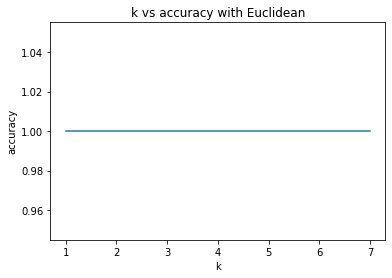

In [26]:
import matplotlib.pyplot as plt
accuracy = [num[0] for num in accuracy_k]
k_vals = [num[1] for num in accuracy_k]
print("Accuracy:",accuracy)
print("K:",k_vals)

plt.plot(k_vals, accuracy) 
  
plt.xlabel('k')
plt.ylabel('accuracy')  
plt.title("k vs accuracy with Euclidean") 
# plt.legend()
plt.show() 

## Reportings for Custom kNN Classifier

### Accuracy Score

In [29]:
from sklearn.metrics import *
accuracy_score(test_labels[:], predictions)

1.0

### Confusion Matrix

In [30]:
confusion_matrix(test_labels[:], predictions)

array([[505,   0],
       [  0, 495]])

### f1_score

In [31]:
f1_score(test_labels[:], predictions, average='micro', zero_division=1)

1.0

### Classification Score

In [32]:
print(classification_report(test_labels[:], predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       505
           p       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



## Reportings for Scikit-learn’s kNN classifier

### Accuracy Score

In [33]:
train_data=knn_classifier.train_df.values
# print(train_data)
test_data=knn_classifier.test_df.values
# print(label_of_train_data)

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_data, label_of_train_data.ravel())

predictions_inbuilt_knn = neigh.predict(test_data)

accuracy_score(test_labels[:], predictions_inbuilt_knn)

1.0

### Confusion matrix

In [34]:
confusion_matrix(test_labels[:], predictions_inbuilt_knn)

array([[505,   0],
       [  0, 495]])

### f1_score

In [35]:
f1_score(test_labels[:], predictions, average='micro', zero_division=1)

1.0

### Classification Score

In [36]:
print(classification_report(test_labels[:], predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       505
           p       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

